* NAME: RISHABH PATIL
* SAP: 60009200056
* BATCH: K2

In [1]:

!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:

import yfinance as yf

In [3]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# For reading stock data from yahoo
import yfinance as yf
from datetime import datetime
from pandas_datareader import data as pdr
from pandas_datareader.data import DataReader
yf.pdr_override()

In [4]:

# The tech stocks we'll use for this analysis
stock = 'TSLA'

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(2000, 1, 1)
start = '2020-01-01'

df = yf.download(stock, start, end)
df.tail(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-31,197.529999,207.789993,197.199997,207.460007,207.460007,169638500
2023-04-03,199.910004,202.690002,192.199997,194.770004,194.770004,169545900
2023-04-04,197.320007,198.740005,190.320007,192.580002,192.580002,126463800
2023-04-05,190.520004,190.679993,183.759995,185.520004,185.520004,133882500
2023-04-06,183.080002,186.389999,179.740005,185.059998,185.059998,123857900
2023-04-10,179.940002,185.100006,176.110001,184.509995,184.509995,142154600
2023-04-11,186.690002,189.190002,185.649994,186.789993,186.789993,115770900
2023-04-12,190.740005,191.580002,180.309998,180.539993,180.539993,150256300
2023-04-13,182.960007,186.500000,180.940002,185.899994,185.899994,112933000


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,827.000000,827.000000,827.000000,827.000000,827.000000,8.270000e+02
mean,203.901476,208.699398,198.613740,203.758959,203.758959,1.350576e+08
std,92.669967,94.573502,90.404644,92.445508,92.445508,9.696314e+07
min,24.980000,26.990667,23.367332,24.081333,24.081333,2.940180e+07
25%,139.648331,142.879997,135.945000,139.983337,139.983337,7.125075e+07
50%,217.843338,222.046661,210.139999,216.866669,216.866669,9.924120e+07
75%,271.750000,276.308334,264.368332,270.083328,270.083328,1.726955e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 827 entries, 2020-01-02 to 2023-04-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       827 non-null    float64
 1   High       827 non-null    float64
 2   Low        827 non-null    float64
 3   Close      827 non-null    float64
 4   Adj Close  827 non-null    float64
 5   Volume     827 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 45.2 KB


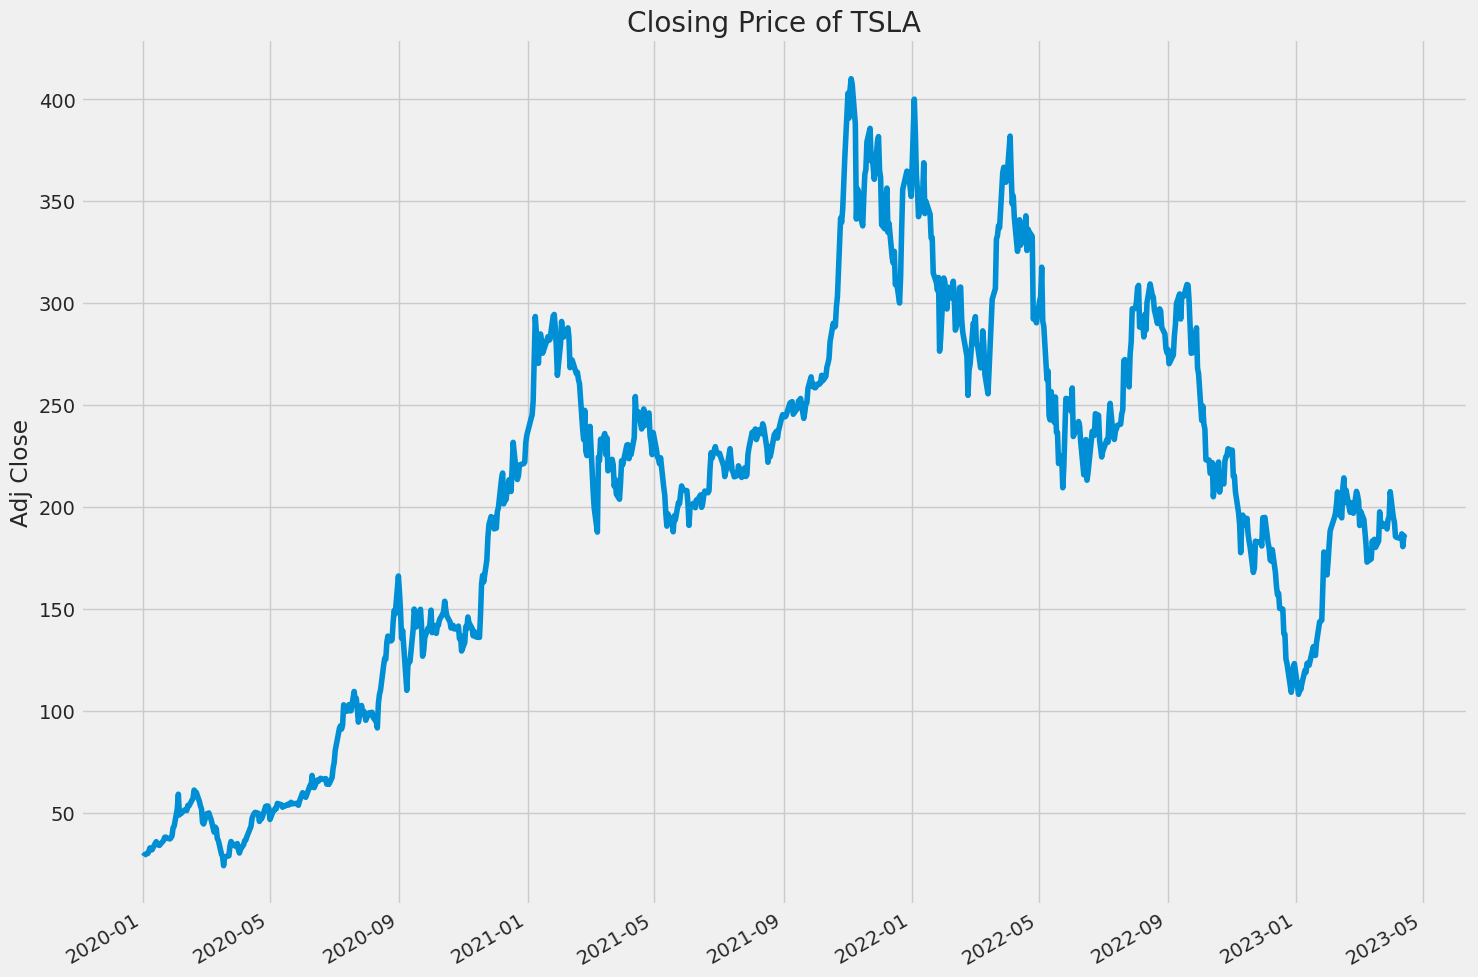

In [7]:

# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
df['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title(f"Closing Price of {stock}")
    
plt.tight_layout()
plt.show()

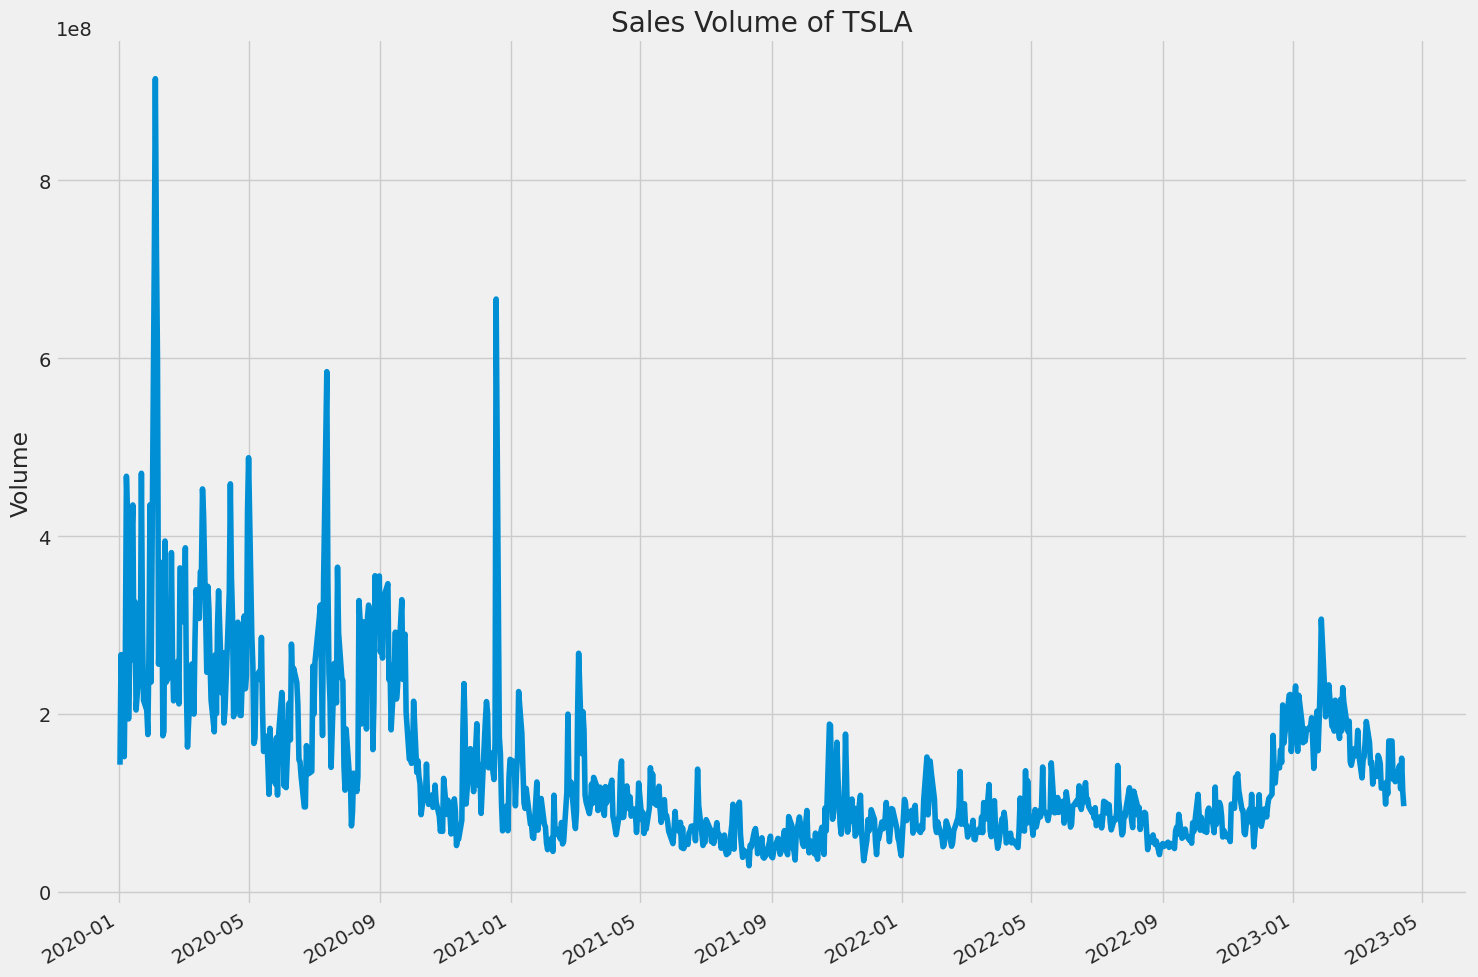

In [8]:

# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
df['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title(f"Sales Volume of {stock}")
    
plt.tight_layout()
plt.show()

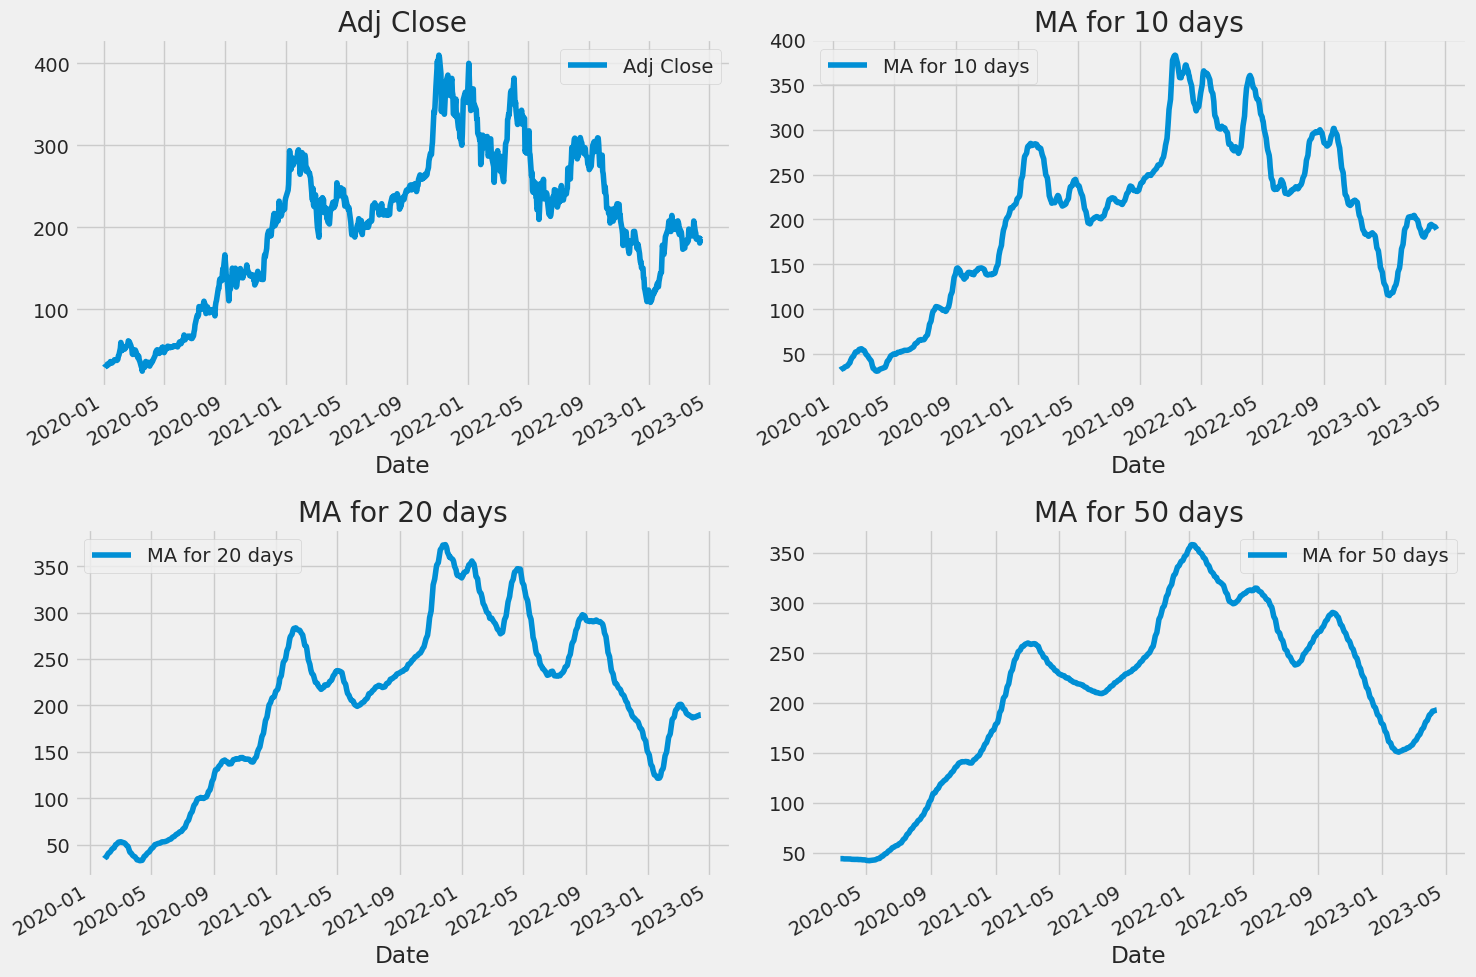

<Figure size 1500x1000 with 0 Axes>

In [9]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    df[column_name] = df['Adj Close'].rolling(ma).mean()
        
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

df[['Adj Close']].plot(ax=axes[0,0])
axes[0,0].set_title('Adj Close')

df[['MA for 10 days']].plot(ax=axes[0,1])
axes[0,1].set_title('MA for 10 days')

df[['MA for 20 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MA for 20 days')

df[['MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('MA for 50 days')

fig.tight_layout()
plt.figure(figsize=(15, 10))
plt.show()

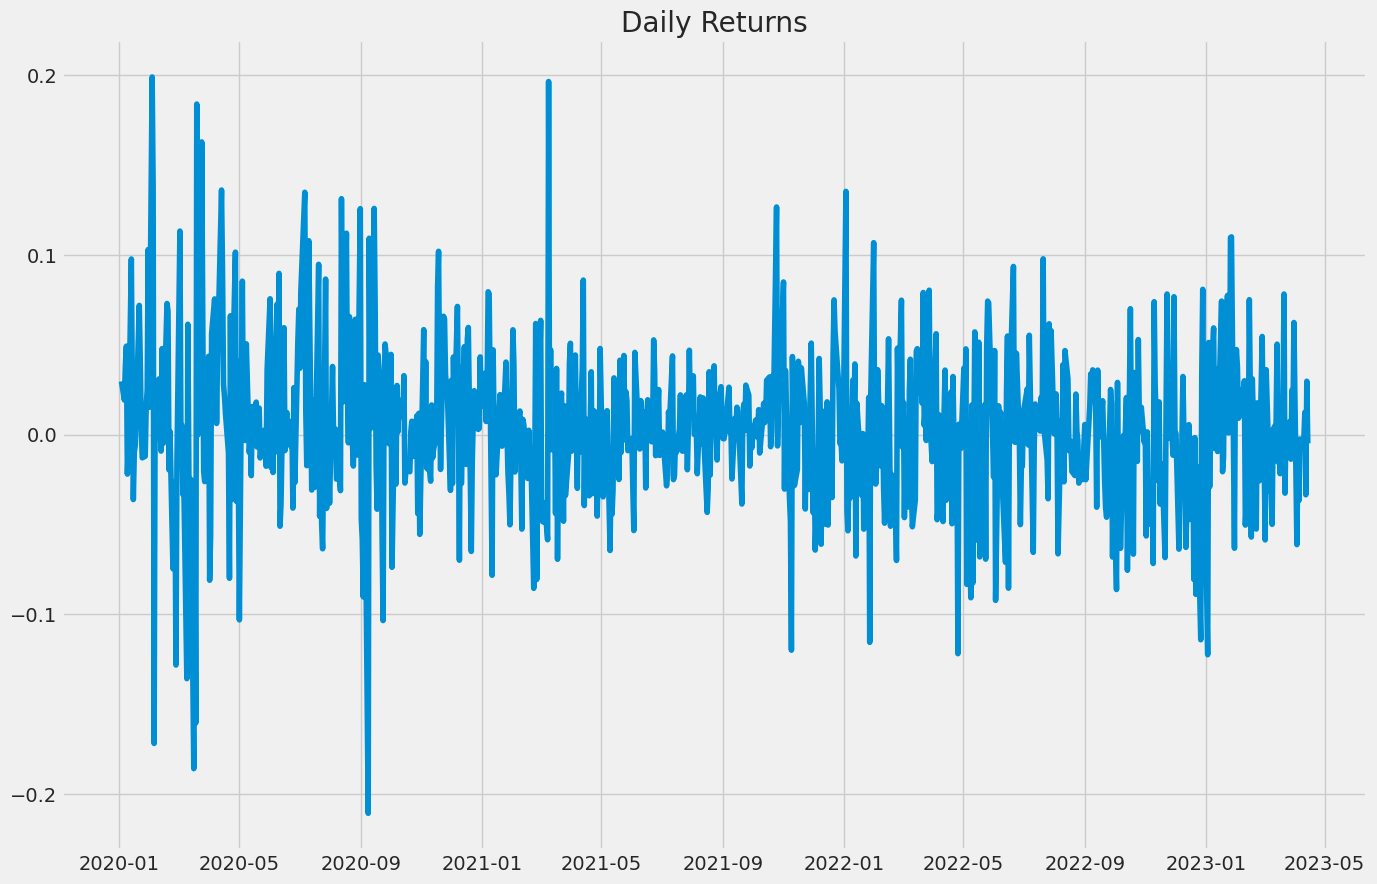

In [10]:
df['Daily Return'] = df['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
plt.figure(figsize=(15, 10))
plt.plot(df['Daily Return'])
plt.title('Daily Returns')
plt.show()

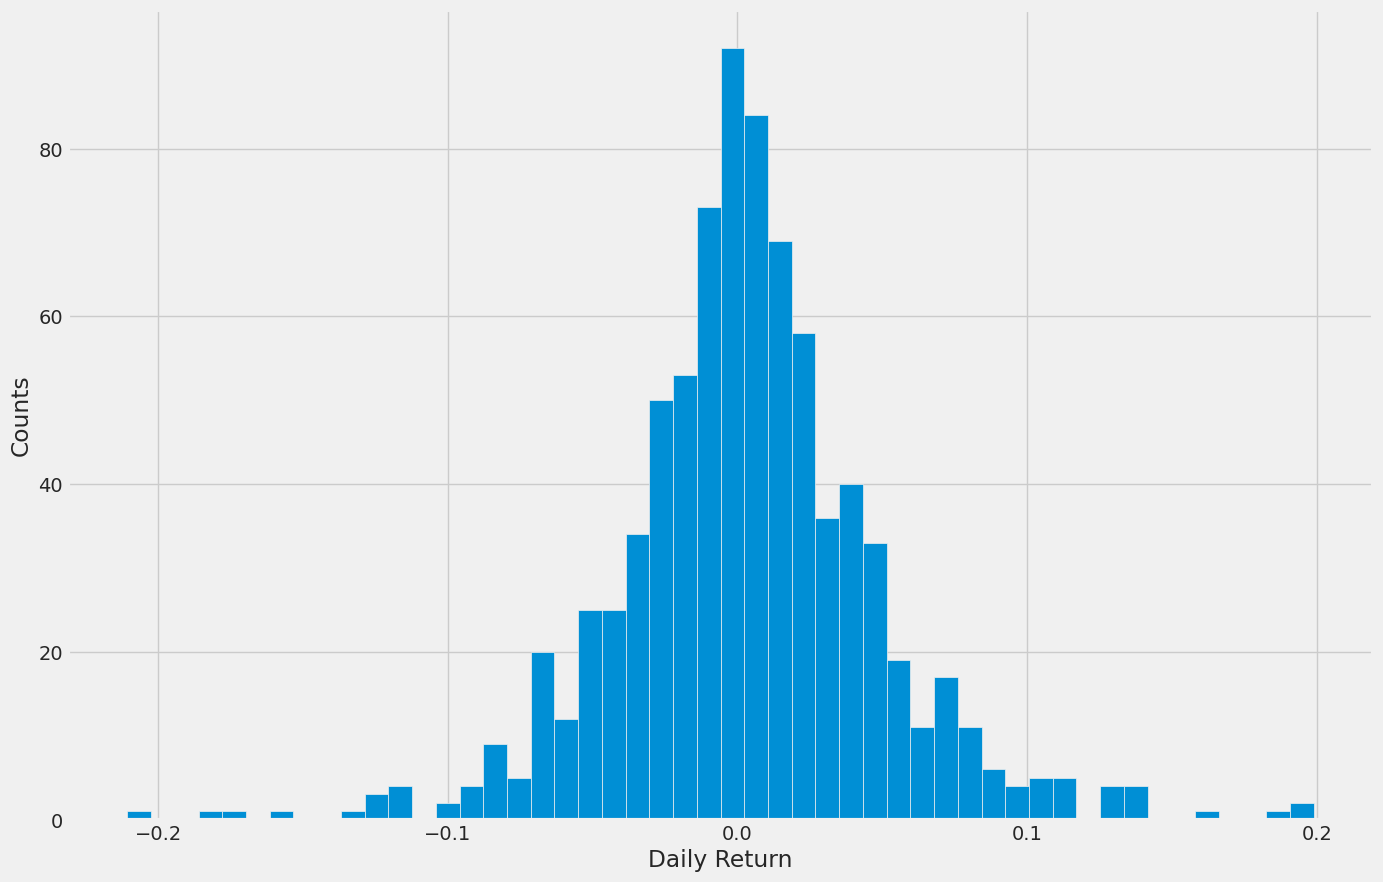

In [11]:

fig = plt.figure(figsize=(15, 10))
df['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.show()

In [12]:
df = pdr.get_data_yahoo('AAPL', start=start, end=datetime.now())
# Show teh data
df.head()
     

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.449379,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.735321,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.314873,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.970078,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.143906,132079200


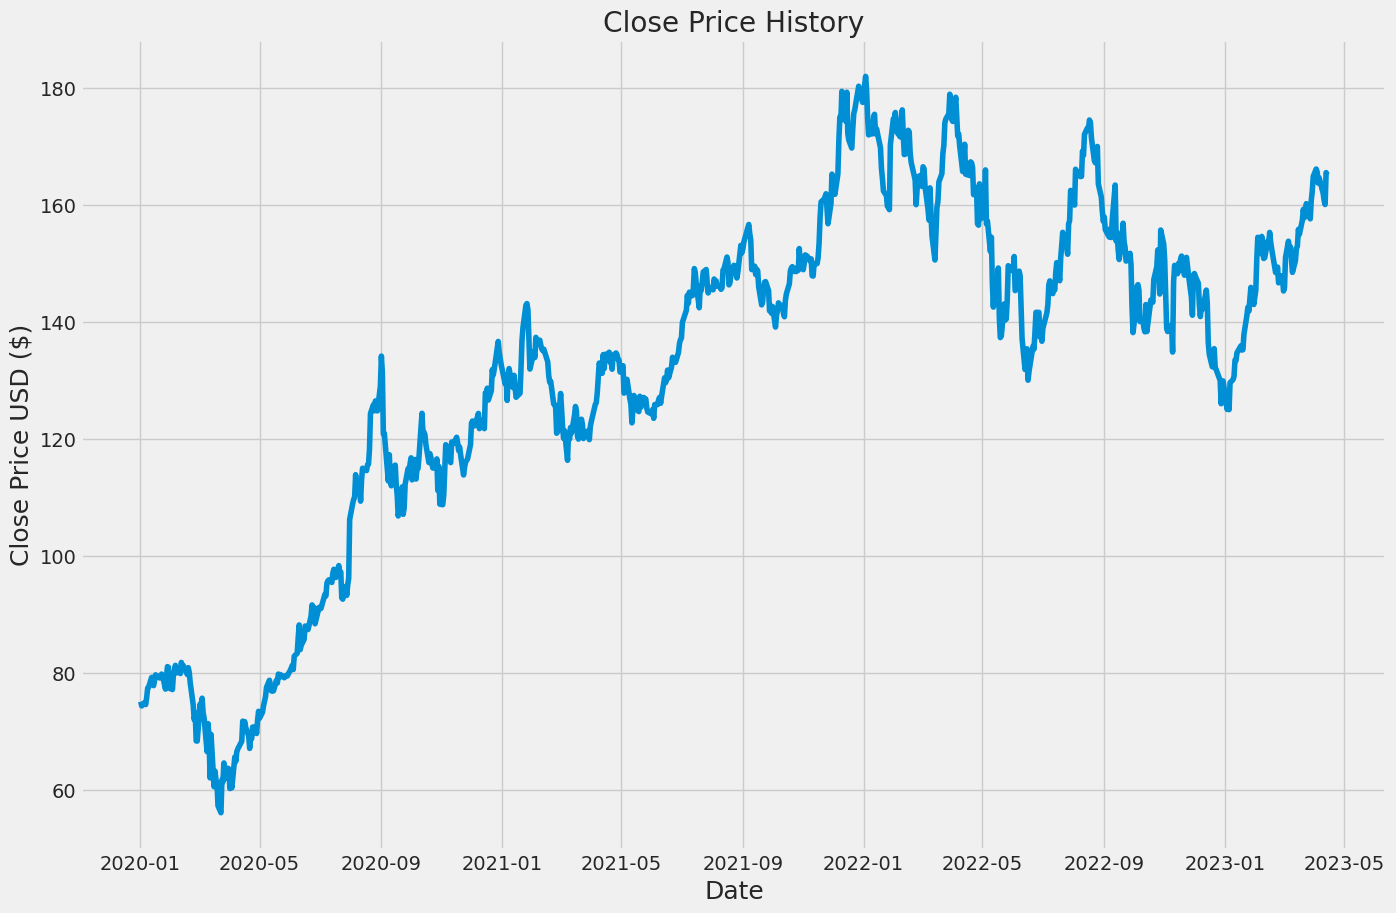

In [13]:

plt.figure(figsize=(15,10))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [14]:

# Create a new dataframe with only the 'Close' column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

786

In [15]:

# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.15085277],
       [0.14505529],
       [0.14976075],
       [0.14696135],
       [0.15649137],
       [0.16927753],
       [0.17066729],
       [0.18383068],
       [0.17533306],
       [0.17267259],
       [0.18041574],
       [0.18734493],
       [0.1830564 ],
       [0.18529994],
       [0.18833764],
       [0.18651102],
       [0.16792745],
       [0.18528007],
       [0.19848314],
       [0.19754999],
       [0.16903929],
       [0.16735166],
       [0.18758317],
       [0.19274529],
       [0.20021045],
       [0.18992596],
       [0.19294378],
       [0.18909205],
       [0.2041615 ],
       [0.19953542],
       [0.19969428],
       [0.18788097],
       [0.19705363],
       [0.190462  ],
       [0.17606765],
       [0.14654436],
       [0.12649154],
       [0.13556496],
       [0.09758373],
       [0.09726605],
       [0.14779519],
       [0.12895351],
       [0.15559791],
       [0.13610106],
       [0.12837772],
       [0.08299089],
       [0.12105149],
       [0.101

In [16]:

# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

In [17]:

from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=1)

23/23 [==============================] - 10s 155ms/step - loss: 0.0581


In [18]:

# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 1s 18ms/step


8.431466364414606

<ipython-input-19-44a072488fb9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


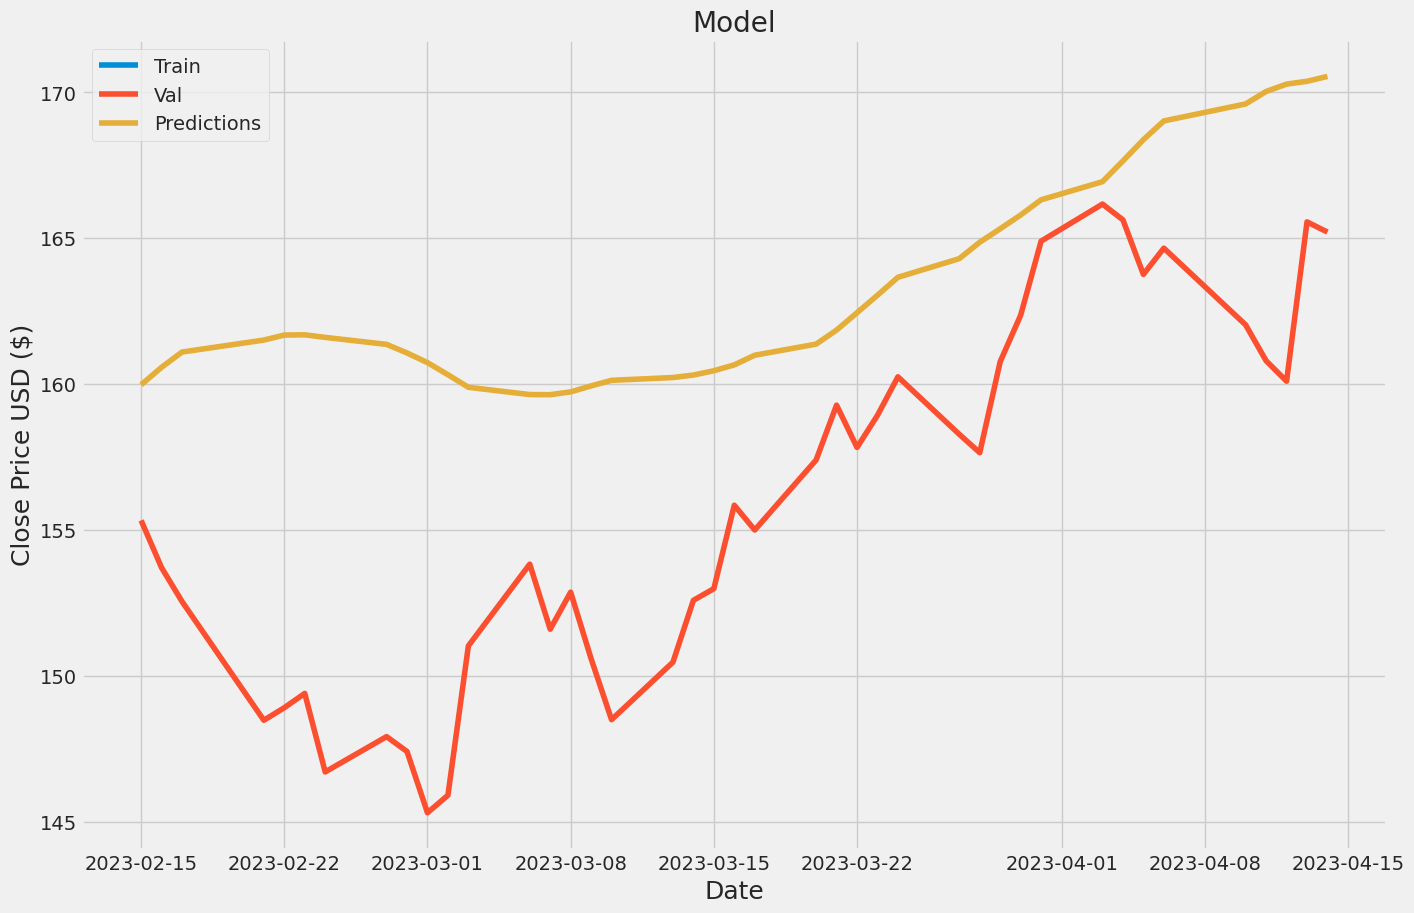

In [19]:

# Plot the data
train = data.iloc[5300:training_data_len, :]
valid = data.iloc[training_data_len:, :]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(15, 10))

plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='best')

plt.show()